<a href="https://colab.research.google.com/github/Munanom/Entropy_DT/blob/main/weight_%26_biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#load data set
data = pd.read_csv("/content/sample_data/urlset.csv", encoding='ISO-8859-1')
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51451,www.snickers.se/Snickers/Corp/,10000000,1,0,2.0,28.500000,26.500000,0.333333,0.263158,0.263158,0.283019,0.789474,0.746032,0.0
51452,www.freewebs.com/jaclothier/,5001,1,1,1.0,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.370370,0.705882,0.0
51453,buccanada.com/Recycling/,10000000,0,0,1.0,29.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612903,0.0
51454,members.tripod.com/branson2/,1267,1,1,1.0,24.000000,20.000000,0.000000,0.024390,0.000000,0.029412,0.681818,0.571429,0.0


In [ ]:
#find shape of data
data.shape

(51456, 14)

In [ ]:
#check the null data set
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       1
jaccard_ARrd     1
jaccard_ARrem    1
label            3
dtype: int64

<Axes: >

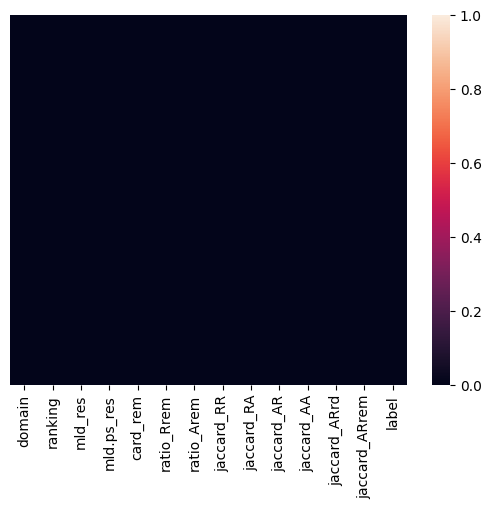

In [ ]:
#draw the heat map
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='rocket')

In [ ]:
#describe the data
data.describe()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,label
count,5.145600e+04,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51455.000000,51455.000000,51453.000000
mean,8.108164e+06,0.239700,0.101329,6.165810,130.643853,133.004839,0.001106,0.001071,0.000969,0.001010,0.152052,0.930986
std,3.891429e+06,0.426904,0.305289,5.265725,133.325623,143.720884,0.013950,0.012845,0.012687,0.014068,0.288112,0.253481
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+07,0.000000,0.000000,2.000000,54.000000,49.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000e+07,0.000000,0.000000,5.000000,111.625000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000e+07,0.000000,0.000000,9.000000,168.513889,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+07,1.000000,11.000000,151.909091,2992.000000,3309.500000,0.747283,0.627660,0.639626,0.805233,1.000000,1.000000


<ipython-input-11-40b52873825e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='magma')


<Axes: xlabel='label', ylabel='count'>

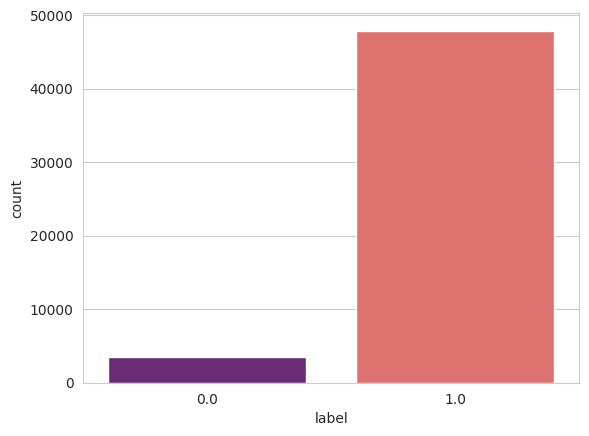

In [ ]:
#draw a countplot
sns.set_style('whitegrid')
sns.countplot(x='label', data=data, palette='magma')

<Axes: xlabel='label', ylabel='count'>

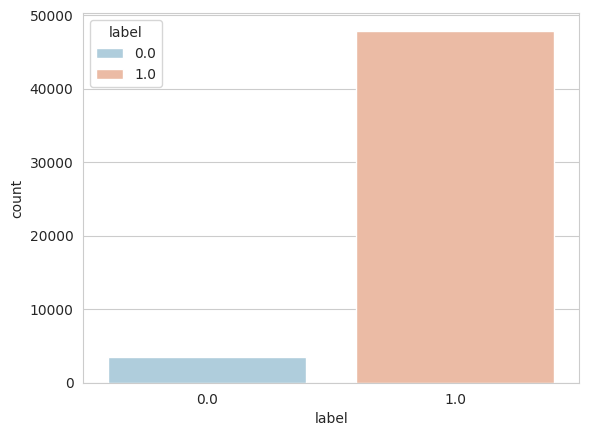

In [ ]:
#draw another countplot
sns.set_style('whitegrid')
sns.countplot(x='label', hue='label',data=data, palette='RdBu_r')

In [ ]:
#drop null values
data.dropna()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51450,www.gm-workwear.com/index.htm,10000000,0,0,2.0,57.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.681818,0.0
51451,www.snickers.se/Snickers/Corp/,10000000,1,0,2.0,28.500000,26.500000,0.333333,0.263158,0.263158,0.283019,0.789474,0.746032,0.0
51452,www.freewebs.com/jaclothier/,5001,1,1,1.0,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.370370,0.705882,0.0
51453,buccanada.com/Recycling/,10000000,0,0,1.0,29.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612903,0.0


<Axes: >

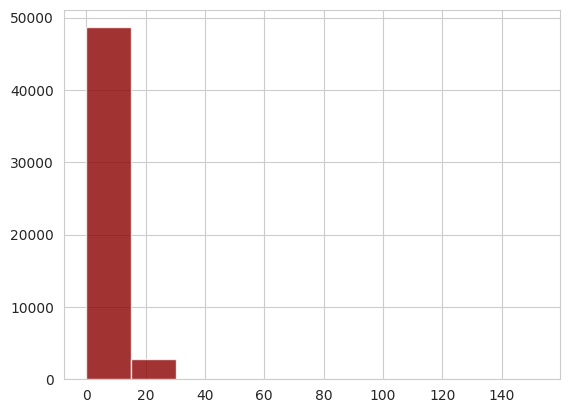

In [ ]:
#draw hsitogram
data['card_rem'].hist(bins=10, color='darkred', alpha=0.8)

<Axes: xlabel='mld.ps_res', ylabel='count'>

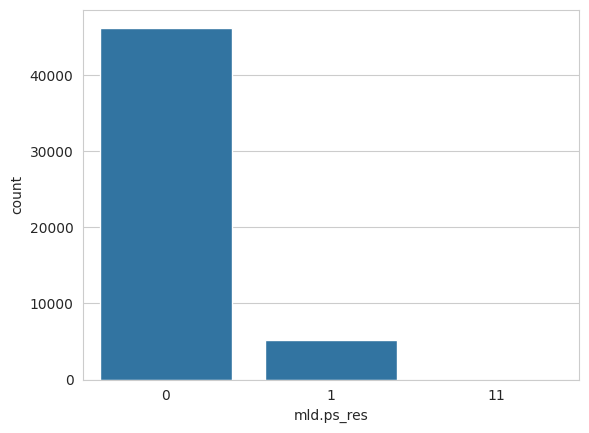

In [ ]:
#draw a countplot
sns.countplot(x='mld.ps_res', data=data)

In [ ]:
#check for the null data
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       1
jaccard_ARrd     1
jaccard_ARrem    1
label            3
dtype: int64

In [ ]:
#drop rows
data.dropna(inplace=True)

In [ ]:
#check the data which is bull
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

In [ ]:
#drop the domain column
data.drop(['domain'], axis=1,inplace=True)

In [ ]:
#import the sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#divide data into train and test
X_train,X_test,Y_train,Y_test =train_test_split(data.drop('label',axis=1),data['label'], test_size=0.2, random_state=101)

In [ ]:

#import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#equate logmodel
logmodel = LogisticRegression()

In [ ]:
logmodel

LogisticRegression()

In [ ]:
#view X_train
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
16880,10000000,0,0,1.0,101.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.708333
24633,10000000,0,0,9.0,71.888889,68.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.81295
34971,10000000,0,0,3.0,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259259
40633,4570,1,1,14.0,107.000000,104.857143,0.004651,0.004065,0.002663,0.002037,0.571429,0.818516
48367,3103,1,1,2.0,70.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.789474,0.721212
...,...,...,...,...,...,...,...,...,...,...,...,...
5695,10000000,0,0,14.0,177.285714,180.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.768008
8006,10000000,0,0,1.0,208.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.511236
17745,10000000,0,0,5.0,128.400000,130.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.807531
17931,10000000,0,0,2.0,229.000000,236.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845238


In [ ]:
#Y tain
Y_train

16880    1.0
24633    1.0
34971    1.0
40633    1.0
48367    0.0
        ... 
5695     1.0
8006     1.0
17745    1.0
17931    1.0
45921    1.0
Name: label, Length: 41162, dtype: float64

In [ ]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#predictions
predictions = logmodel.predict(X_test)

In [ ]:
#predictions
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import auc, accuracy_score, classification_report,log_loss, confusion_matrix

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       688
         1.0       0.93      1.00      0.97      9603

    accuracy                           0.93     10291
   macro avg       0.47      0.50      0.48     10291
weighted avg       0.87      0.93      0.90     10291



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Axes(0.125,0.11;0.62x0.77)


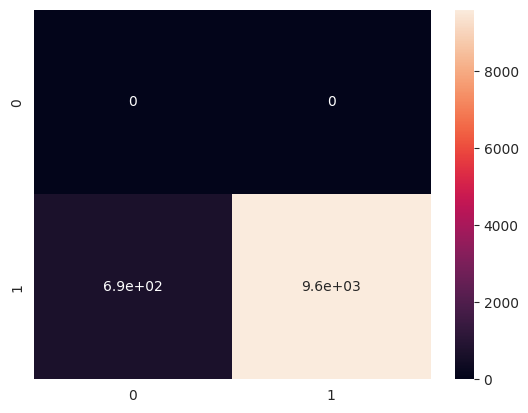

In [ ]:
#display the confusion matrix
print(sns.heatmap(confusion_matrix(predictions, Y_test), annot=True))

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt

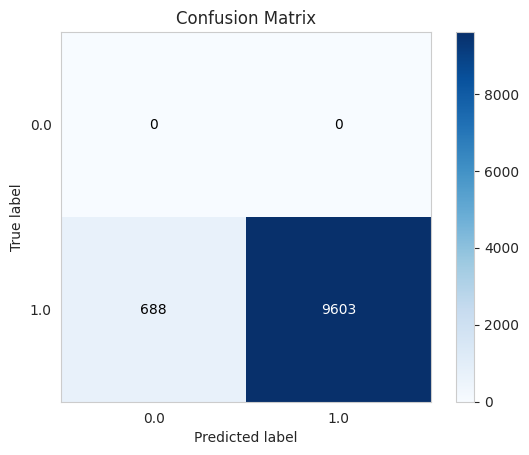

In [ ]:
skplt.metrics.plot_confusion_matrix(predictions, Y_test)
plt.show()

In [ ]:
predicted_probas = logmodel.predict_proba(X_test)

In [ ]:
predicted_probas

array([[0.04268757, 0.95731243],
       [0.04268757, 0.95731243],
       [0.04268757, 0.95731243],
       ...,
       [0.04268757, 0.95731243],
       [0.04268757, 0.95731243],
       [0.04268757, 0.95731243]])

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9331454669128365


#Decision Tree

In [ ]:
data

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51450,10000000,0,0,2.0,57.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.681818,0.0
51451,10000000,1,0,2.0,28.500000,26.500000,0.333333,0.263158,0.263158,0.283019,0.789474,0.746032,0.0
51452,5001,1,1,1.0,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.370370,0.705882,0.0
51453,10000000,0,0,1.0,29.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612903,0.0


In [ ]:
from sklearn import tree

In [ ]:
X = data.drop(columns= 'label')

In [ ]:
y=data['label']

In [ ]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
51450    0.0
51451    0.0
51452    0.0
51453    0.0
51454    0.0
Name: label, Length: 51453, dtype: float64

In [ ]:
#drop null values
y.dropna()

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
51450    0.0
51451    0.0
51452    0.0
51453    0.0
51454    0.0
Name: label, Length: 51453, dtype: float64

In [ ]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
51450    0.0
51451    0.0
51452    0.0
51453    0.0
51454    0.0
Name: label, Length: 51453, dtype: float64

In [ ]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729
1,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577
2,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582
3,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964
4,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
51450,10000000,0,0,2.0,57.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.681818
51451,10000000,1,0,2.0,28.500000,26.500000,0.333333,0.263158,0.263158,0.283019,0.789474,0.746032
51452,5001,1,1,1.0,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.370370,0.705882
51453,10000000,0,0,1.0,29.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612903


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
import pydotplus

In [ ]:

from IPython.display import Image

In [ ]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['Phising','Legit'],
                              filled=True,out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="card_rem <= 4.5\\nentropy = 0.362\\nsamples = 51453\\nvalue = [3551, 47902]\\nclass = Legit", fillcolor="#48a4e7"] ;\n1 [label="mld.ps_res <= 0.5\\nentropy = 0.573\\nsamples = 24532\\nvalue = [3329, 21203]\\nclass = Legit", fillcolor="#58ace9"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="card_rem <= 0.5\\nentropy = 0.459\\nsamples = 21698\\nvalue = [2101, 19597]\\nclass = Legit", fillcolor="#4ea8e8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.043\\nsamples = 3231\\nvalue = [15, 3216]\\nclass = Legit", fillcolor="#3a9de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.509\\nsamples = 18467\\nvalue = [2086, 16381]\\nclass = Legit", fillcolor="#52a9e8"] ;\n2 -> 4 ;\n5 [label="jaccard_ARrd <= 0.627\\nentropy = 0.987\\nsamples = 2834\\nvalue = [1228, 1606]\\nclass = Legit", fillcolor="#d0e8f9"] ;\n1 -> 5 ;\n6 [label="entropy = 0.597\\nsamples = 1636

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

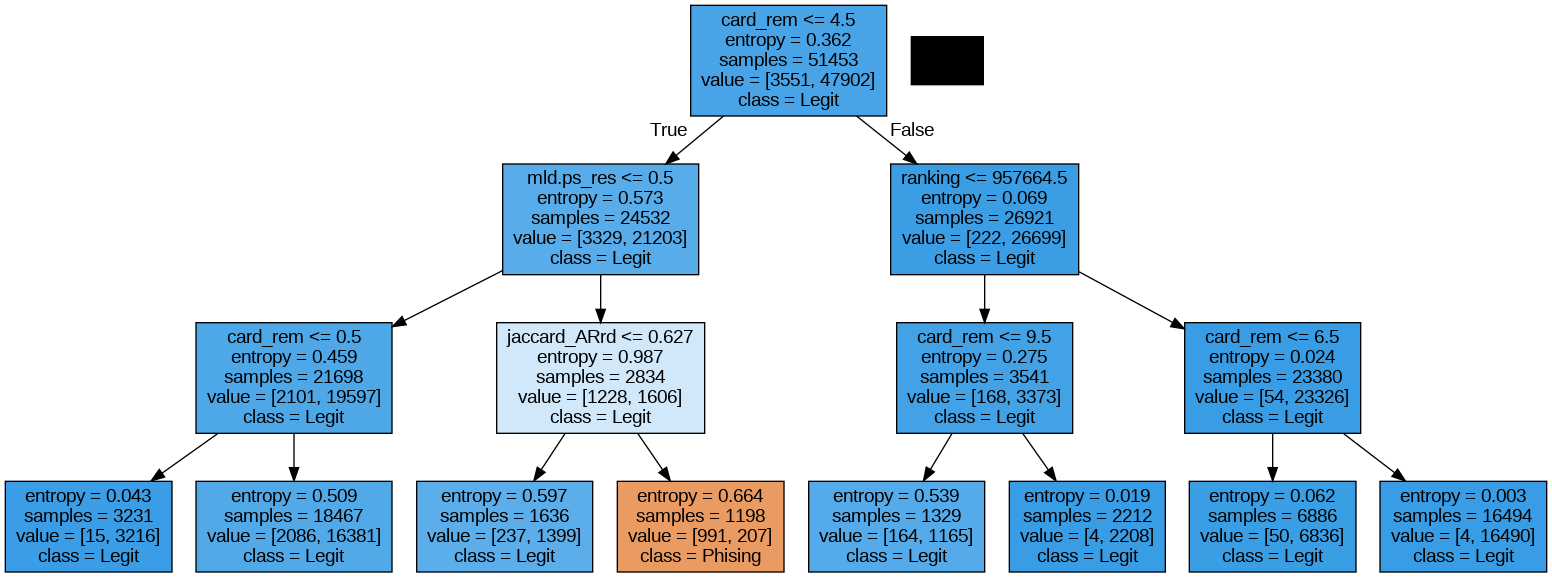

In [ ]:
graph


Image(graph.create_png())


In [ ]:
testData=[['mld.ps_res',0,0,0,0,1,1,'Phising'],
          ['samples', 1,0,0,0,1,1,'Legit'],
          ['mld_res', 1,0,0,1,1,0,'Phising'],
          ['card_rem',18,15,8,11,10,9,'Legit']]


testData

[['mld.ps_res', 0, 0, 0, 0, 1, 1, 'Phising'],
 ['samples', 1, 0, 0, 0, 1, 1, 'Legit'],
 ['mld_res', 1, 0, 0, 1, 1, 0, 'Phising'],
 ['card_rem', 18, 15, 8, 11, 10, 9, 'Legit']]

In [ ]:
data.columns

Index(['ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

In [ ]:
pip install wandb

In [ ]:
import wandb

In [ ]:
import wandb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
wandb.login()

wandb: Currently logged in as: munanuman55 (munanuman55-technology-networks). Use `wandb login --relogin` to force relogin


True

In [ ]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Weight&BiasesProject",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

acc,▁▆▅▇█▇▆▇
loss,█▅▂▃▂▂▁▁
acc,0.90112
loss,0.06905


In [ ]:
pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [ ]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
#@title
import wandb
import math
import random
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as T

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def get_dataloader(is_train, batch_size, slice=5):
    "Get a training dataloader"
    full_dataset = torchvision.datasets.MNIST(root=".", train=is_train, transform=T.ToTensor(), download=True)
    sub_dataset = torch.utils.data.Subset(full_dataset, indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(dataset=sub_dataset,
                                         batch_size=batch_size,
                                         shuffle=True if is_train else False,
                                         pin_memory=True, num_workers=2)
    return loader

def get_model(dropout):
    "A simple model"
    model = nn.Sequential(nn.Flatten(),
                         nn.Linear(28*28, 256),
                         nn.BatchNorm1d(256),
                         nn.ReLU(),
                         nn.Dropout(dropout),
                         nn.Linear(256,10)).to(device)
    return model

def validate_model(model, valid_dl, loss_func, log_images=False, batch_idx=0):
    "Compute performance of the model on the validation dataset and log a wandb.Table"
    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(device), labels.to(device)

            # Forward pass ➡
            outputs = model(images)
            val_loss += loss_func(outputs, labels)*labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i==batch_idx and log_images:
                log_image_table(images, predicted, labels, outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)

def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table":table}, commit=False)

In [ ]:
# Launch 5 experiments, trying different dropout rates
for _ in range(5):
    # 🐝 initialise a wandb run
    wandb.init(
        project="pytorch-intro",
        config={
            "epochs": 10,
            "batch_size": 128,
            "lr": 1e-3,
            "dropout": random.uniform(0.01, 0.80),
            })

    # Copy your config
    config = wandb.config

    # Get the data
    train_dl = get_dataloader(is_train=True, batch_size=config.batch_size)
    valid_dl = get_dataloader(is_train=False, batch_size=2*config.batch_size)
    n_steps_per_epoch = math.ceil(len(train_dl.dataset) / config.batch_size)

    # A simple MLP model
    model = get_model(config.dropout)

    # Make the loss and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

   # Training
    example_ct = 0
    step_ct = 0
    for epoch in range(config.epochs):
        model.train()
        for step, (images, labels) in enumerate(train_dl):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            train_loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            example_ct += len(images)
            metrics = {"train/train_loss": train_loss,
                       "train/epoch": (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                       "train/example_ct": example_ct}

            if step + 1 < n_steps_per_epoch:
                # 🐝 Log train metrics to wandb
                wandb.log(metrics)

            step_ct += 1

        val_loss, accuracy = validate_model(model, valid_dl, loss_func, log_images=(epoch==(config.epochs-1)))

        # 🐝 Log train and validation metrics to wandb
        val_metrics = {"val/val_loss": val_loss,
                       "val/val_accuracy": accuracy}
        wandb.log({**metrics, **val_metrics})

        print(f"Train Loss: {train_loss:.3f}, Valid Loss: {val_loss:3f}, Accuracy: {accuracy:.2f}")

    # If you had a test set, this is how you could log it as a Summary metric
    wandb.summary['test_accuracy'] = 0.8

    # 🐝 Close your wandb run
    wandb.finish()

wandb: Currently logged in as: munanuman55 (munanuman55-technology-networks). Use `wandb login --relogin` to force relogin


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11497768.17it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 352272.80it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3142348.63it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 649258.02it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Train Loss: 0.438, Valid Loss: 0.302711, Accuracy: 0.92
Train Loss: 0.288, Valid Loss: 0.244204, Accuracy: 0.93
Train Loss: 0.258, Valid Loss: 0.222553, Accuracy: 0.93
Train Loss: 0.221, Valid Loss: 0.204286, Accuracy: 0.94
Train Loss: 0.143, Valid Loss: 0.194430, Accuracy: 0.94
Train Loss: 0.234, Valid Loss: 0.188838, Accuracy: 0.94
Train Loss: 0.170, Valid Loss: 0.176410, Accuracy: 0.95
Train Loss: 0.119, Valid Loss: 0.167725, Accuracy: 0.95
Train Loss: 0.091, Valid Loss: 0.168343, Accuracy: 0.95
Train Loss: 0.135, Valid Loss: 0.162667, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▆▅▄▃▃▃▃▂▂▂▃▃▂▂▃▂▂▂▃▂▂▁▂▂▂▁▂▂▂▂▁▁▁▂▂▂▂▁▂
val/val_accuracy,▁▃▄▆▆▆▇▇▇█
val/val_loss,█▅▄▃▃▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.13503
val/val_accuracy,0.952
val/val_loss,0.16267


Train Loss: 0.469, Valid Loss: 0.326049, Accuracy: 0.91
Train Loss: 0.267, Valid Loss: 0.264298, Accuracy: 0.92
Train Loss: 0.322, Valid Loss: 0.239705, Accuracy: 0.93
Train Loss: 0.256, Valid Loss: 0.212276, Accuracy: 0.93
Train Loss: 0.317, Valid Loss: 0.203539, Accuracy: 0.94
Train Loss: 0.194, Valid Loss: 0.191503, Accuracy: 0.94
Train Loss: 0.151, Valid Loss: 0.191086, Accuracy: 0.94
Train Loss: 0.261, Valid Loss: 0.183140, Accuracy: 0.94
Train Loss: 0.186, Valid Loss: 0.181823, Accuracy: 0.94
Train Loss: 0.228, Valid Loss: 0.178676, Accuracy: 0.94


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▂▁▁▁▁▂▁▁▁▁▁▁▂▁▁
val/val_accuracy,▁▄▅▆▇█▇███
val/val_loss,█▅▄▃▂▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.22822
val/val_accuracy,0.942
val/val_loss,0.17868


Train Loss: 0.348, Valid Loss: 0.303902, Accuracy: 0.91
Train Loss: 0.257, Valid Loss: 0.251876, Accuracy: 0.93
Train Loss: 0.305, Valid Loss: 0.221784, Accuracy: 0.93
Train Loss: 0.147, Valid Loss: 0.207284, Accuracy: 0.94
Train Loss: 0.416, Valid Loss: 0.187093, Accuracy: 0.94
Train Loss: 0.160, Valid Loss: 0.186411, Accuracy: 0.94
Train Loss: 0.173, Valid Loss: 0.174382, Accuracy: 0.94
Train Loss: 0.097, Valid Loss: 0.162425, Accuracy: 0.95
Train Loss: 0.091, Valid Loss: 0.160474, Accuracy: 0.95
Train Loss: 0.075, Valid Loss: 0.165437, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▃▂▂▃▃▃▂▂▂▂▂▂▂▂▂▃▂▁▂▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▂▁▁
val/val_accuracy,▁▄▅▆▆▆▇▇█▇
val/val_loss,█▅▄▃▂▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.07503
val/val_accuracy,0.9495
val/val_loss,0.16544


Train Loss: 0.206, Valid Loss: 0.288918, Accuracy: 0.91
Train Loss: 0.276, Valid Loss: 0.235568, Accuracy: 0.93
Train Loss: 0.157, Valid Loss: 0.203706, Accuracy: 0.94
Train Loss: 0.114, Valid Loss: 0.189104, Accuracy: 0.94
Train Loss: 0.144, Valid Loss: 0.174652, Accuracy: 0.94
Train Loss: 0.080, Valid Loss: 0.170687, Accuracy: 0.94
Train Loss: 0.187, Valid Loss: 0.160182, Accuracy: 0.95
Train Loss: 0.064, Valid Loss: 0.155355, Accuracy: 0.95
Train Loss: 0.033, Valid Loss: 0.157079, Accuracy: 0.95
Train Loss: 0.044, Valid Loss: 0.148112, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▅▄▂▃▃▃▂▂▂▂▁▂▃▁▁▁▁▁▁▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▄▆▆▆▇▇███
val/val_loss,█▅▄▃▂▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.04449
val/val_accuracy,0.951
val/val_loss,0.14811


Train Loss: 0.280, Valid Loss: 0.277891, Accuracy: 0.92
Train Loss: 0.172, Valid Loss: 0.225835, Accuracy: 0.93
Train Loss: 0.082, Valid Loss: 0.190940, Accuracy: 0.94
Train Loss: 0.083, Valid Loss: 0.185732, Accuracy: 0.94
Train Loss: 0.080, Valid Loss: 0.162644, Accuracy: 0.95
Train Loss: 0.075, Valid Loss: 0.167884, Accuracy: 0.94
Train Loss: 0.032, Valid Loss: 0.158400, Accuracy: 0.95
Train Loss: 0.030, Valid Loss: 0.151432, Accuracy: 0.95
Train Loss: 0.057, Valid Loss: 0.153009, Accuracy: 0.95
Train Loss: 0.032, Valid Loss: 0.157666, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▄▃▃▃▃▂▂▂▂▂▁▂▂▂▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▃▅▆█▇██▇█
val/val_loss,█▅▃▃▂▂▁▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.03193
val/val_accuracy,0.9505
val/val_loss,0.15767
